In [16]:
#Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Loading the dataset from local machine.
#Pass your dataset's location as parameter // URLs can also be used.
iris_dataset = pd.read_csv("D:\\ML\\Datasets\\IRIS\\Iris.csv")

In [13]:
#Getting dataset info
iris_dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
#Gathering mathematical info from the dataset like count, mean
iris_dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Ratio,SepalRatio,PetalRatio
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.843333,3.054000,3.758667,1.198667,1.955144,1.955144,4.367166
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.398697,0.398697,2.651508
min,0.000000,4.300000,2.000000,1.000000,0.100000,1.268293,1.268293,2.125000
25%,37.250000,5.100000,2.800000,1.600000,0.300000,1.551915,1.551915,2.802381
50%,74.500000,5.800000,3.000000,4.350000,1.300000,2.032292,2.032292,3.300000
75%,111.750000,6.400000,3.300000,5.100000,1.800000,2.224910,2.224910,4.666667
max,149.000000,7.900000,4.400000,6.900000,2.500000,2.961538,2.961538,15.000000


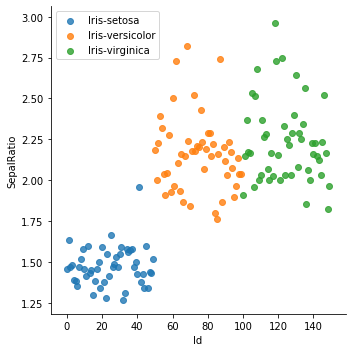

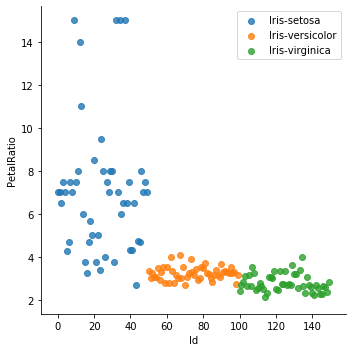

In [29]:
#Visualizing the data.
#Plotting petal and sepal ratios for the three species against Id.
iris_dataset["Id"] = iris_dataset.index
iris_dataset["SepalRatio"] = iris_dataset["SepalLengthCm"]/iris_dataset["SepalWidthCm"]
iris_dataset["PetalRatio"] = iris_dataset["PetalLengthCm"]/iris_dataset["PetalWidthCm"]

sns.lmplot(x="Id", y="SepalRatio", data=iris_dataset, hue="Species", fit_reg=False, legend=False)
plt.legend()
sns.lmplot(x="Id", y="PetalRatio", data=iris_dataset, hue="Species", fit_reg=False, legend=False)
plt.legend()
plt.show()

In [43]:
#Splitting training and testing data in 70:30
from sklearn.model_selection import train_test_split
x = iris_dataset.iloc[ : , 1 : -4]
y = iris_dataset.iloc[ : , 5]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

In [45]:
#Model training using SVM
from sklearn.svm import SVC
model = SVC(gamma = 'auto')
model.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [46]:
#Determining model accuracy
print("Model accracy is : ", model.score(x_test, y_test))

Model accracy is :  1.0


In [47]:
#Predicting from the trained model
prediction = model.predict(x_test)

In [50]:
#Classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[17  0  0]
 [ 0 14  0]
 [ 0  0 14]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      1.00      1.00        14
 Iris-virginica       1.00      1.00      1.00        14

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

